# Dimensionality Reduction Tutorial

In this tutorial, we want to repeat the most important topics from the lecture and learn how to implement these in python. 
We will download the famous MNIST data set, perform dimensionality reduction and cluster the results. At the end we get to something similiar as shown in the last slide of the lecture. 

<img src="https://bigsnarf.wordpress.com/wp-content/uploads/2016/11/tsne_mnist_all.png" alt="drawing" width="200"/>


## Theory of PCA 

The actual dimensionality reduction will be only 3 lines of code with much theory behind it. Let's repeat the most important parts: 

### Definition 
Technique to transform a number of possibly correlated variables into a smaller number of variables called principal components. 

### Workflow (!)
1. Build covriance matrix of standardized data
2. Get eigenvectors and eigenvalues 
3. Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues
4. Project dataset to obtain a k-dimensional feature subspace


### Mathematics 
#### 1. Build covriance matrix

Assume n observations, each having p variables. All data is:
$$ R = \begin{pmatrix} 
r_{11} & r_{12} & \cdots & r_{1p} \\
r_{21} & r_{22} & \cdots & r_{2p} \\
\vdots & \vdots  & \vdots & \vdots \\
r_{n1} & r_{n2} & \cdots & r_{np} \\
 \end{pmatrix} $$
 with one row being one observation. 

 As often in data manipulation, it is crucial to standardize the data. For all p variables, we transfer each n values so that they have zero mean and standard deviation of one. This is done via 
 $$ z_{ij} = {r_{ij} - \overline{r_j} \over \sigma_j} $$
with observation i and variable j. Remember the variance of a sample is defined by 
$$ \sigma^2_x = {1 \over N-1} \sum_{i=1}^N(x_i - \overline{x})^2 $$

 In general, the covariance is given by: 
$$ Cov(X,Y) = \sigma_{xy} = {1 \over N-1} \sum_{i=1}^N((x_i - \overline{x}) (y_i - \overline{y})) $$

So the variance is a special case of the covariance as Cov(x,x).

The symmetric (pxp) covariance matrix has the variances on the main diagonal and covariances elsewhere. For our case it looks like: 
$$ C_r = \begin{pmatrix} 
\sigma^2_{1} & \sigma_{12} & \cdots & \sigma_{1p} \\
\sigma_{21} & \sigma^2_{2} & \cdots & \sigma_{2p} \\
\vdots & \vdots  & \vdots & \vdots \\
\sigma_{p1} & \sigma_{p2} & \cdots & \sigma^2_{p} \\
 \end{pmatrix} $$

#### 2. Solve the eigenvalue problem of the Covariance matrix

 $$ C_r \vec{v_i} = \lambda_i \vec{v_i} $$ 
 This gives p eigenvalues $\lambda_i$ with p corresponding eigenvectors (components) $\vec{v_i}$

#### 3. Sort eigenvalues and choose the $k\le p$ highest eigenvalues with their corresponding eigenvectors 
 
 The nice property of these special eigenvalues of the covariance matrix is the direct relation to the total variance of the dataset. For the standardized dataset X, the total variance is the sum of all p variances. The eigenvectors of the first two highest eigenvalues can explain $ { \lambda_1 + \lambda_2 \over \sum_{i=1}^p \lambda_i } $ of the total variance. 

 Example: There are 500 observations of speed and weight. The unit does not matter, because all speeds and all weights are standardized for themselves. Both variances are 1, and the covariance is let's say 0.6. The Eigenvalues of the covariance matrix $ \begin{pmatrix} 1 & 0.6 \\ 0.6 & 1 \end{pmatrix} $ are $ \lambda_1=1.6 $ and $ \lambda_2=0.4 $. This means that the eigenvector $\vec{v_1}$ of $\lambda_1$ can explain ${1.6 \over 1+1}=80\%$ of the total variance of the 500 observations.   

#### 4. Project the data
 
Geometrically, the projection of a datapoint onto a line is achieved by following the rectangular connection between the point and the line: 

 
<img src="https://i.sstatic.net/Tyemt.png" alt="drawing" width="300"/>

When we project the datapoints onto the first eigenvector, we get the first principal component (PC1). 

Mathematically the point (x1,x2) is projected onto the line that has the normed slope (v1, v2) via 
$$z=(x_1,x_2)  \begin{pmatrix} v_1 \\ v_2  \end{pmatrix} = x_1v_1 + x_2v_2$$

In the example above, when we plot speed and weight and project all datapoints onto the first eigenvector, the dimensionality is reduced from 2 to 1. Imagine, you would project all points onto the green PC1 line, the variance of the resulting (1-dimensional) numbers would be 80% of the variance of all (2-dimensional) datapoints in the original plot. 

<img src=https://miro.medium.com/v2/resize:fit:640/format:webp/1*V9yJUH9tVrMQI88TuIkCFQ.gif alt="drawing" width="300"/>

Note that all eigenvectors are orthogonal (in fact orthonormal), because of the symmetric covariance matrix. Using all eigenvectors would just result in rotating the coordinate system leading to the full description of 100% of the variance. 

Generally, putting the first k eigenvectors into a matrix (feature matrix V) results in a (pxk) matrix. The projection of the original (nxp) dataset X onto the new (nxk) dataset Y is simply
$$ Y = XV $$ 

## Hand-on MNIST Dataset and PCA
Here we load a data set and inspect it shortly. We are working with pictures of handwritten digits from zero to nine. The MNIST dataset contains 60,000 training images and 10,000 testing images.

In [15]:
import numpy as np 
np.set_printoptions(precision=3) # numpy prints all numbers up to 3rd decimals 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist # the data set 
from sklearn.preprocessing import StandardScaler # scaler that can transform all data to mean=0 and std=1
from sklearn.decomposition import PCA # principal component analysis
from sklearn.cluster import KMeans # clustering algorithm

In [16]:
# load it
data = mnist.load_data()

The MNIST dataset is organized as following: 

data is a tuple with length 2: data[0] is the trainset and data[1] the testset. 

Each of data[0] and data[1] is again a tuple with length 2: data[x][0] are the features in an 28x28 array and data[x][1] are the labels in type numpy.uint8 (integers). 

In [4]:
# inspecting
print("Shape of training features: ", data[0][0].shape)
print("Shape of training targets: ", data[0][1].shape)
print("First training data point looks like this:\n", data[0][0][0])

Shape of training features:  (60000, 28, 28)
Shape of training targets:  (60000,)
First training data point looks like this:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

In this 28x28 array, zero means white, 253 means black and in between there is grey. It is difficult to interpret with the eye. Let's visualize it.

The target of the eigth training data point is:  3
The visualized pixels look like this:


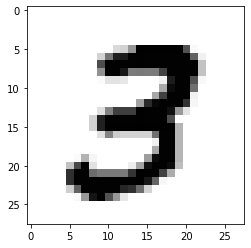

In [17]:
print("The target of the eigth training data point is: ", data[0][1][7])
print("The visualized pixels look like this:")
plt.imshow(data[0][0][7], cmap = plt.cm.binary)
plt.show()

After inspecting the data set, we declare variables for convenience to not get confused by data[x][y].

In [7]:
(x_train,y_train), (x_test,y_test) = data
print("Training features have shape: ", x_train.shape) 

Training features have shape:  (60000, 28, 28)


First, we flatten the 28x28 arrays to one vector with dimension 28x28=784. Then, we standardize.

In [8]:
# instantiate standard scaler 
scaler = StandardScaler()
# fit the scaler to the training data and transform the training data
print("Shape before flattening: ", x_train.shape)
x_train = x_train.reshape(-1, 28*28) # flatten the 28x28 images to 784x1 
print("Shape after flattening: ", x_train.shape)
x_train = scaler.fit_transform(x_train)


Shape before flattening:  (60000, 28, 28)
Shape after flattening:  (60000, 784)


Now, we have 60,000 training data points and each is represented as a single vector of dimension 784. Inspecting the first data point makes you see that the pixel values were scaled from (0,253) to values around 0.

In [19]:
print("Some entries of the first training data point. They contain positive and negative standardized pixels:\n", x_train[0][150:170])

Some entries of the first training data point. They contain positive and negative standardized pixels:
 [-0.423 -0.515 -0.585 -0.541 -0.626 -0.669  0.344  0.531  1.102 -0.266
  1.716  3.773  4.939  3.45  -0.131 -0.075 -0.032 -0.008  0.    -0.006]


### Actual dimensionality reduction 

In [30]:
# instantiate a pca object with 2 components
pca = PCA(n_components=2)
# fit the pca objects to the training data 
print("The next step can take half a minute...")
print("The 784x784 Covariance matrix of 60,000 samples is built and diagonalized")
pca.fit(x_train)
# transform (project) the training data 
print("Transforming training data")
x_train_pca = pca.transform(x_train)
print("all done")
# we could have done the fit and transform in one step with pca.fit_transform(x_train)

The next step can take half a minute...
The 784x784 Covariance matrix of 60,000 samples is built and diagonalized
Transforming training data
all done


Now the training (!) data was projected onto 2D. Let's plot it and color code each datapoint with the target.

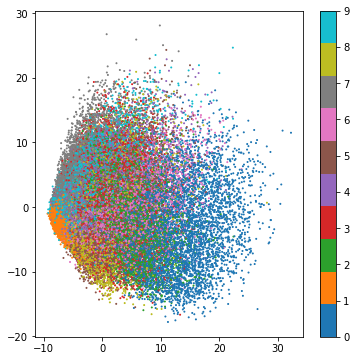

In [36]:
# plot x_train_pca with the colors of the digits
plt.figure(figsize=(6,6))
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='tab10', s=1)
plt.colorbar()
plt.show()

You might see a rough clustering, but it is far from being good. With these poor results, we don't want to continue with the prediction of the test set. First, let's try to cluster it and evaluate the accuracy on the trainset, using the 
## k-means algorithm

In [47]:
# instantiate a kmeans object with 10 clusters
kmeans=KMeans(n_clusters=10)
# fit it to the train set  
kmeans.fit(x_train_pca)


KMeans(n_clusters=10)

After the kmeans cluster algorithm was fitted. Some key properties are stored in typical variables with a tailing underscore, e.g. the coordinates of the centroids. 

In [58]:
print("The cluster centers in the PCA space are:\n", kmeans.cluster_centers_)
print("The first 10 cluster assignments are:\n", kmeans.labels_[:10])

The cluster centers in the PCA space are:
 [[-6.451 -1.363]
 [ 0.448  0.147]
 [ 4.332 -6.816]
 [-4.292  3.402]
 [-2.206 -5.156]
 [17.589  3.104]
 [ 7.169 11.803]
 [-0.241  8.004]
 [ 6.93   1.986]
 [13.779 -8.25 ]]
The first 10 cluster assignments are:
 [4 2 7 0 3 1 0 2 0 4]


Let's visualize the clusters and their centroids and compare them against the targets. 

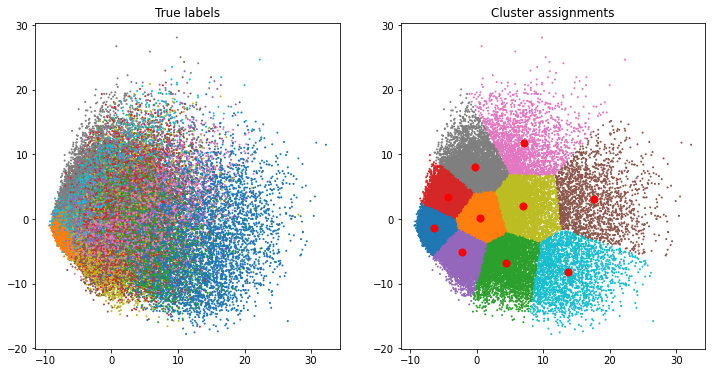

In [59]:
# create two subplots with the true labels and the cluster assignments
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='tab10', s=1)
ax[0].set_title("True labels")
ax[1].scatter(x_train_pca[:,0], x_train_pca[:,1], c=kmeans.labels_, cmap='tab10', s=1)
# plot the cluster centers as well
ax[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
ax[1].set_title("Cluster assignments")
plt.show()

The kmeans algorithm did its best to cluster the data set. 
The process under the hood was easier than the one for PCA. In a nutshell, it chooses k (here 10) random centroids $\vec{\mu_i}$ for the clusters $c_i$

The squared deviation between the points in a cluster and its centroid is given by 
$$ J(c_i) = \sum_j{|\vec{x_j}-\vec{\mu_i}|^2} $$
Summed up over all cluster, the function to minimize is the sum of all variances:
$$ J = \sum_{i=1}^k{J(c_i)} = \sum_{i=1}^k \sum_{j\in i}{|\vec{x_j}-\vec{\mu_i}|^2}  $$

For a given set of centroids, each datapoint will be assigned to the nearest cluster-centroid. This explains the shapes of the cluster in the upper picture. In the next iteration, the centroids are moved. The way how they can be moved is beyond the scope of this exercise. 